<a href="https://colab.research.google.com/github/mardzyuba/Faker/blob/master/Lesson7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston_data = load_boston()

x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# Задание 1.


---



1. Взять все признаки из датасета с урока. Применить модель Random Forest.

Датасет Бостон недоступен, поэтому взяла аналог Калифорния.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

housing = fetch_california_housing()

x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

1. Взять все признаки из датасета с урока. Применить модель Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

2. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.

In [ ]:
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  
  print({'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)
  })



{'MAE train': 0.12380019470494605, 'MAE test': 0.33804002808279493, 'MSE train': 0.03572205452348314, 'MSE test': 0.2715101717705207, 'R2 train': 0.9731940255241484, 'R2 test': 0.7957593019585407}


# Самостоятельная работа.

---



2. Здесь расчитала корреляцию по новым данным, для сравнения.Создала модель линейной регрессии(как в уроке)
  Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.

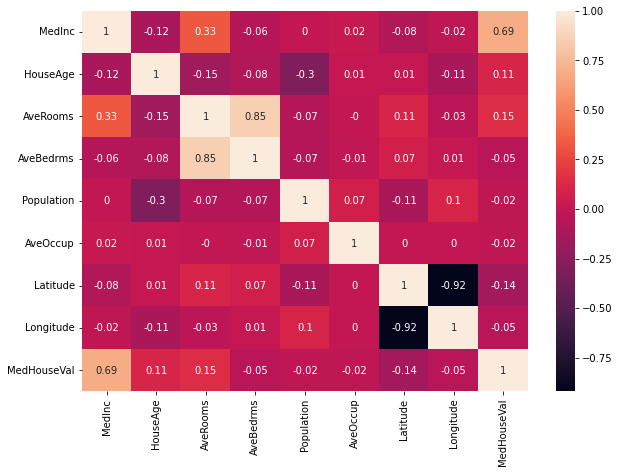

In [ ]:
x_corr = x.copy()
x_corr['MedHouseVal'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
features = [['MedInc','AveRooms'], ['MedInc','AveRooms', 'AveBedrms'], ['MedInc','Latitude'], ['Latitude', 'Longitude']]

In [ ]:
metrics_1 = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics_1 = metrics_1.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

print(metrics_1)

                        Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0             [MedInc, AveRooms]   0.618180  0.627031   0.702645  0.726471  0.467454  0.473451
1  [MedInc, AveRooms, AveBedrms]   0.612052  0.619749   0.689267  0.708870  0.477594  0.486209
2             [MedInc, Latitude]   0.622535  0.624351   0.688984  0.694263  0.477808  0.496796
3          [Latitude, Longitude]   0.865633  0.883322   1.234067  1.282518  0.064681  0.070426


Сравнив данные по двум моделям, можно сделать вывод, что модель Random Forest намного лучше по показателям!

MAE -  чем выше это значение, тем хуже модель.

MSE - чем выше это значение, тем хуже модель.

R^2 - чем ближе к 1 тем лучше модель.

---



'MAE train': 0.12380019470494605, 
'MAE test': 0.33804002808279493, 

---



'MSE train': 0.03572205452348314, 
'MSE test': 0.2715101717705207, 

---



'R2 train': 0.9731940255241484, 
'R2 test': 0.7957593019585407